**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , classification_report
from sklearn.model_selection import KFold , cross_val_score

import warnings
warnings.filterwarnings("ignore")

**Loading Iris Dataset from sklearn**

In [2]:
X,y = load_iris(return_X_y=True , as_frame=True)

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

**Splitting Data into X_train, X_test, y_train , y_test for ML model**

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=22)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


**Building Machine Learning Model**

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, p=1,metric='minkowski',)
knn.fit(X_train , y_train)
    
y_predict = knn.predict(X_test)
y_predict

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2])

**Output Predictions based on inputs**

In [27]:
knn.predict([[2.9 , 1.2 , 2.3 , 4.8]])

array([1])

**Machine Learning Model Evaluation**

**1. Confusion Matrix**

In [7]:
confusion_matrix(y_test , y_predict)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]], dtype=int64)

**2. Accuracy Score**

In [8]:
accuracy_score(y_test , y_predict)

0.9333333333333333

**3. Precision Score**

In [9]:
precision_score(y_test , y_predict ,  average='weighted')

0.9444444444444445

**3. Recall Score**

In [10]:
recall_score(y_test , y_predict , average='weighted')

0.9333333333333333

**Comparing Train_Accuracy and Test_Accuracy for Selection of K-Value**

In [11]:
k_value = []
test_accuracy = []
train_accuracy = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski',)
    knn.fit(X_train , y_train)
    
    y_predict = knn.predict(X_test)
    y_predict_train = knn.predict(X_train)
    
    k_value.append(i)
    
    accuracy_test = accuracy_score(y_test , y_predict)
    accuracy_train = accuracy_score(y_train , y_predict_train)
    
    test_accuracy.append(accuracy_test)
    train_accuracy.append(accuracy_train)

df_accuracy = pd.DataFrame({"K" : k_value ,"Train Accuracy" : train_accuracy, "Test Accuracy" : test_accuracy })
df_accuracy

,K,Train Accuracy,Test Accuracy
0,1,1.000000,0.966667
1,2,0.966667,0.900000
2,3,0.958333,0.966667
3,4,0.975000,0.933333
4,5,0.975000,0.933333
5,6,0.966667,0.933333
6,7,0.966667,0.933333
7,8,0.966667,0.900000
8,9,0.975000,0.933333
9,10,0.966667,0.900000


**Comparing Train and Test Accuracy using plots**

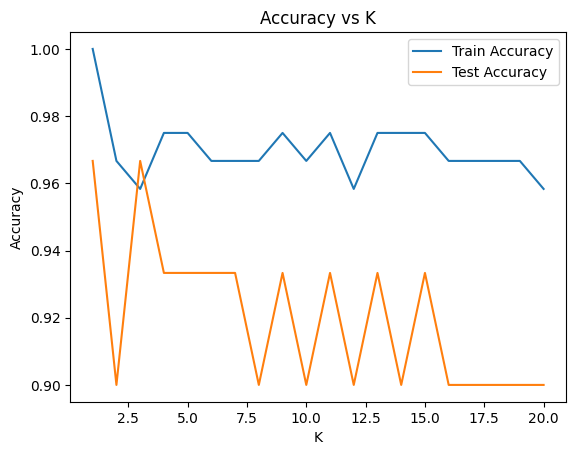

In [12]:
plt.plot(df_accuracy['K'], df_accuracy['Train Accuracy'], label='Train Accuracy')
plt.plot(df_accuracy['K'], df_accuracy['Test Accuracy'], label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.show()


<Axes: xlabel='K', ylabel='Train Accuracy'>

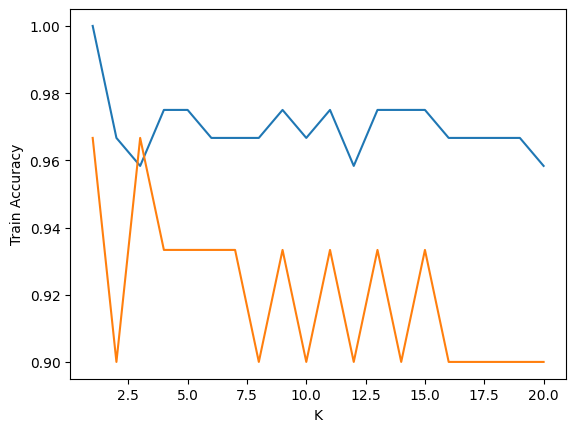

In [13]:
sns.lineplot(data = df_accuracy , x = 'K' , y = 'Train Accuracy')
sns.lineplot(data = df_accuracy , x = 'K' , y = 'Test Accuracy')

**Observation:- Based on above comparision k_neighbors value should be 3 becz there is best fit for train and test accuracy**

**Comparing Train accuracy Validation Accuracy using K-Fold technique**

In [14]:
k = []
train_acc = []
valid_acc = []

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    train = accuracy_score(y_train, y_pred)
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=20)
    cross_val_acc = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    
    k.append(i)
    train_acc.append(train)
    valid_acc.append(cross_val_acc.mean())
    
df_val_trai_acc = pd.DataFrame({"K": k, "Train Accuracy": train_acc, "Validation Accuracy": valid_acc})
df_val_trai_acc

,K,Train Accuracy,Validation Accuracy
0,1,1.000000,0.964427
1,2,0.991071,0.937549
2,3,0.964286,0.964427
3,4,0.964286,0.955336
4,5,0.973214,0.964427
5,6,0.973214,0.964032
6,7,0.973214,0.973123
7,8,0.991071,0.973123
8,9,0.973214,0.973123
9,10,0.973214,0.973123


**Comparing Train and Validation Accuracy using plots**

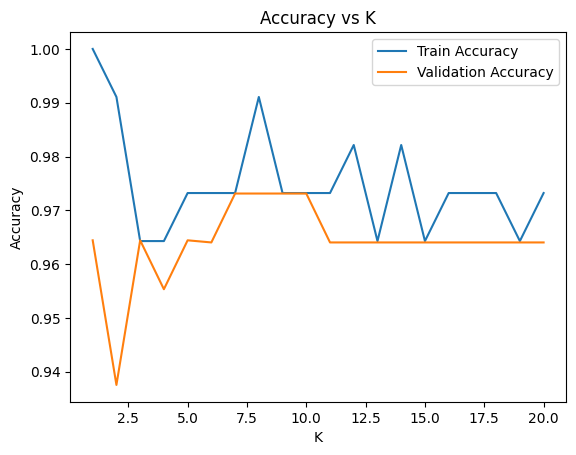

In [15]:
plt.plot(df_val_trai_acc['K'], df_val_trai_acc['Train Accuracy'], label='Train Accuracy')
plt.plot(df_val_trai_acc['K'], df_val_trai_acc['Validation Accuracy'], label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.show()


<Axes: xlabel='K', ylabel='Train Accuracy'>

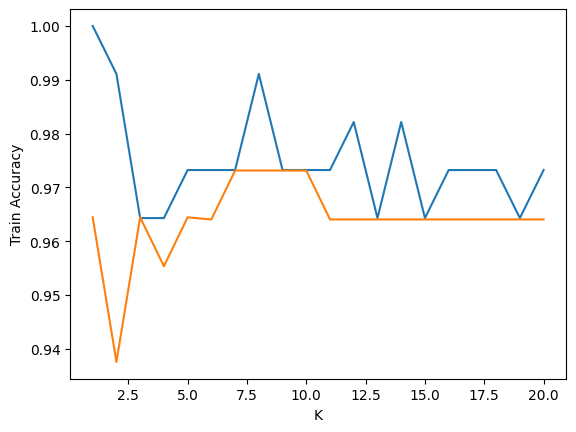

In [16]:
sns.lineplot(data = df_val_trai_acc , x = 'K' , y = "Train Accuracy")
sns.lineplot(data = df_val_trai_acc , x = 'K' , y = "Validation Accuracy")

**Observation:- Based on above comparision k_neighbors value should be 3 becz there is best fit for train and validation accuracy**

**Final ML Model**

In [23]:
knn = KNeighborsClassifier(n_neighbors=3, p=1,metric='minkowski')
knn.fit(X_train , y_train)
    
y_predict = knn.predict(X_test)
accuracy_score(y_test , y_predict)

0.9473684210526315